Mounted at /content/drive
📊 R² Score on Test Set: 0.869088351726532


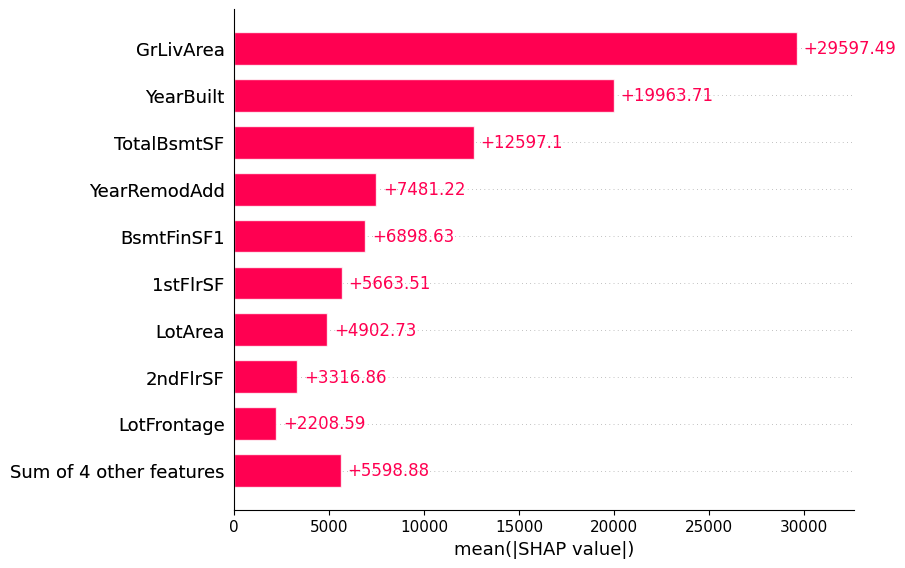

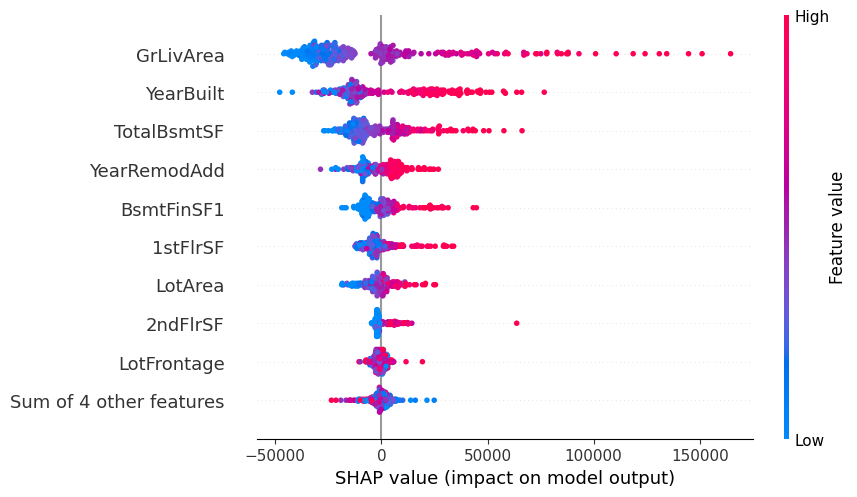

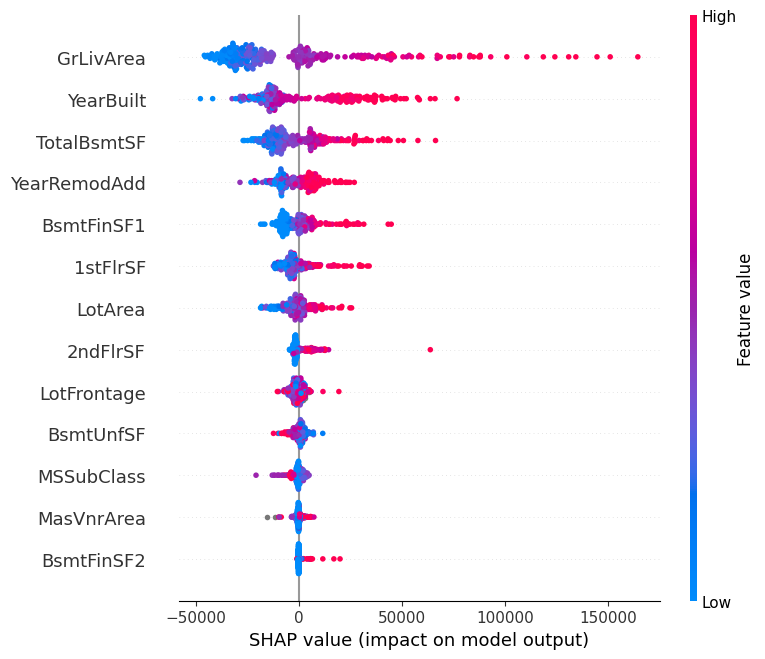

SHAP Interaction Matrix Shape: (292, 13, 13)
Model prediction (first sample): 142145.17
Mean prediction + interaction values (first sample): 139609.25


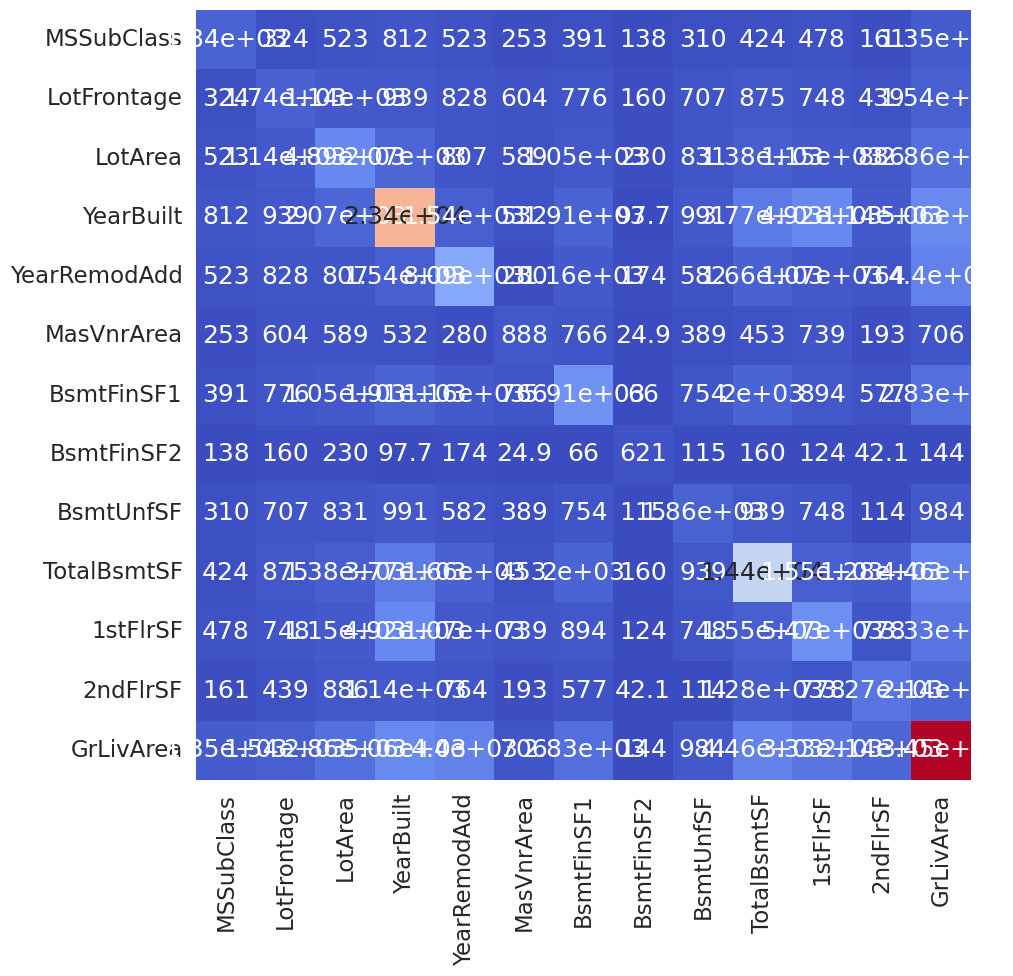

In [6]:
# Import necessary libraries
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a pandas DataFrame  "C:\Users\Luke\IdeaProjects\CS 301\Interpretable-Gradient-Boosting---Real-Estate-House-Price-Prediction-main\train.csv"
train = pd.read_csv("/content/drive/MyDrive/CS-301/house-prices-advanced-regression-techniques/train.csv")

# Select relevant features and target
X = train[["MSSubClass", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea",
           "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"]]
y = train["SalePrice"]  # Ensure target is a 1D array, not DataFrame

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions and calculate R² Score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score on Test Set:", r2)

# SHAP Analysis
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Feature Importance Bar Plot
shap.plots.bar(shap_values)

# Feature Importance Beeswarm Plot
shap.plots.beeswarm(shap_values)

# Summary Plot
shap.summary_plot(shap_values)

# Interaction Analysis
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X_test)
print("SHAP Interaction Matrix Shape:", np.shape(shap_interaction))

# Validate SHAP Predictions
y_pred_test = model.predict(X_test)
mean_pred = np.mean(y_pred_test)
sum_shap = np.sum(shap_interaction[0])
print("Model prediction (first sample):", y_pred_test[0])
print("Mean prediction + interaction values (first sample):", mean_pred + sum_shap)

# Interaction Heatmap
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap, index=X.columns, columns=X.columns)
df.where(df.values == np.diagonal(df), df.values * 2, inplace=True)

plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df, cmap='coolwarm', annot=True, fmt='.3g', cbar=False)
plt.yticks(rotation=0)
plt.show()